In [1]:
%pylab inline
%matplotlib notebook

import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import itertools
import ipympl

plotting.setup_mpl()

ff1.Cache.enable_cache('data')

pd.options.mode.chained_assignment = None

Populating the interactive namespace from numpy and matplotlib


In [2]:
def load_race(year='2021/', gp='2021-09-12_Italian_Grand_Prix/', race='2021-09-12_Race/'):
    if platform == "win32":
        path = 'C:/Users/olive/Documents/Github/F1-Sim/cache/data/'
    elif platform == "darwin":
        path = '~/Documents/Github/F1-Sim/cache/data/' 

    path += year + gp + race

    car_df = pd.read_pickle(path + 'car_data.ff1pkl')
    driver_df = pd.read_pickle(path  + 'driver_info.ff1pkl')
    position_df = pd.read_pickle(path + 'position_data.ff1pkl')
    session_df = pd.read_pickle(path + 'session_status_data.ff1pkl')
    timing_app_df = pd.read_pickle(path + 'timing_app_data.ff1pkl')
    timing_df = pd.read_pickle(path + 'timing_data.ff1pkl')
    track_status_df = pd.read_pickle(path + 'track_status_data.ff1pkl')
    weather_df = pd.read_pickle(path + 'weather_data.ff1pkl')

    nums = list(driver_df['data'].keys())
    drivers = [Driver(driver_df['data'][num]) for num in nums]

    return Race(driver_df, car_df, position_df, timing_app_df, timing_df, track_status_df, weather_df), drivers

In [3]:
race = ff1.get_session(2021, 'Monza',  'R')

laps = race.load_laps(with_telemetry =True)

core           INFO 	Loading laps for Italian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '11', '5', '47', '88', '99', '6', '33', '10', '4', '31', '55', '16', '9', '77', '3', '18', '14', '63', '22']


In [4]:
fastest_lap = laps.pick_fastest()
tel = fastest_lap.get_telemetry()

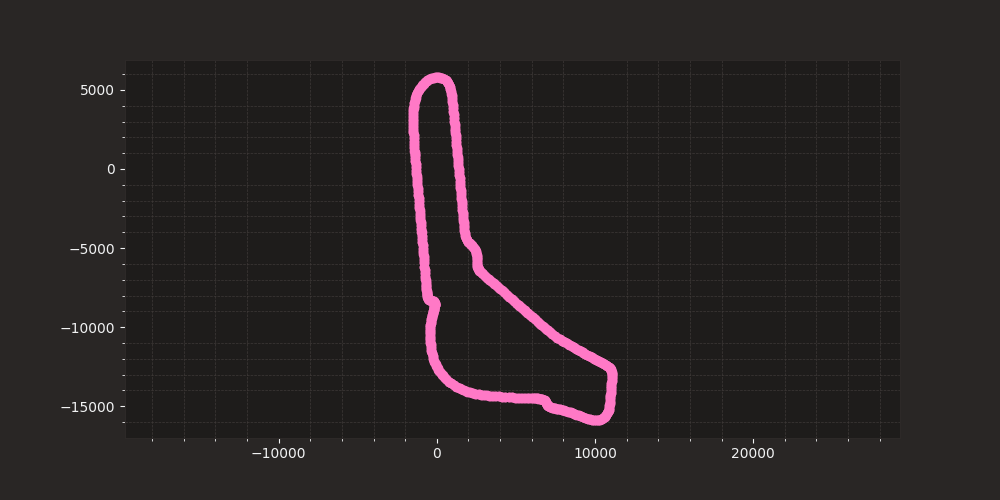

backend_webagg_core    WARNING 	Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 2, 'type': 'set_device_pixel_ratio'}


In [5]:
fig, axs = plt.subplots(1, dpi=100)
fig.set_size_inches(10, 5)

axs.set_xlim(min(tel['X']), max(tel['X']))
axs.set_ylim(min(tel['Y']), max(tel['Y']))

axs.set_title('')
axs.set_xlabel('')
axs.set_ylabel('')
axs.grid()

plt.axis('equal')
plt.scatter(tel['X'].values, -tel['Y'].values)

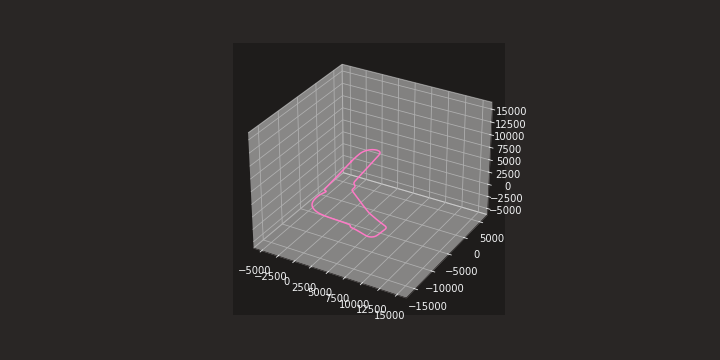

backend_webagg_core    WARNING 	Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 2, 'type': 'set_device_pixel_ratio'}


In [6]:
fig = plt.figure(figsize=(10,5))
axs = plt.axes(projection="3d")

axs.set_xlim3d(min(tel['Y']), max(tel['Y']))
# ax.set_ylim3d(min(tel['Y']), max(tel['Y']))
axs.set_zlim3d(min(tel['Y']), max(tel['Y']))

plt.plot(tel['X'].values, -tel['Y'].values, tel['Z'].values)
plt.show()